# CHAPTER 8

# Ploting and Visualization

## A brief matplotlib API primer

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

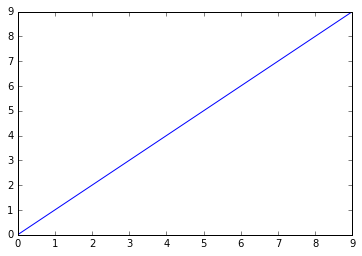

In [7]:
plt.plot(np.arange(10))

## Figures and Subplots

In [8]:
fig = plt.figure()

In [9]:
ax1 = fig.add_subplot(2, 2, 1)

In [10]:
ax2 = fig.add_subplot(2, 2, 2)

In [11]:
ax3 = fig.add_subplot(2, 2, 3)

In [12]:
from numpy.random import randn

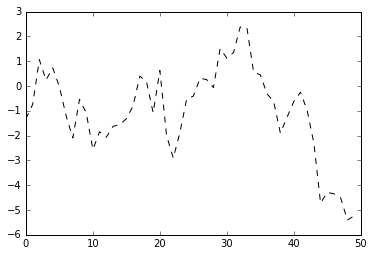

In [13]:
plt.plot(randn(50).cumsum(), 'k--')

In [14]:
_ = ax1.hist(randn(100), bins = 20, color = 'k', alpha = 0.3)

In [15]:
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

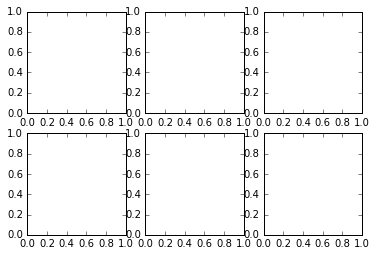

In [16]:
fig, axes = plt.subplots(2, 3)

In [17]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f9f1b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fb55160>]], dtype=object)

In [18]:
axes[0, 1]

## Adjusting the spacing around subplots

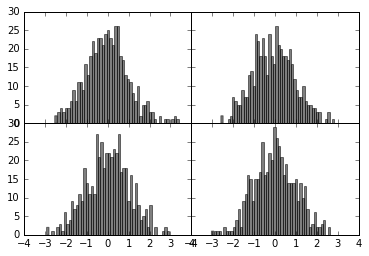

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins = 50, color = 'k', alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)

### Colors, Markers, and Line Styles

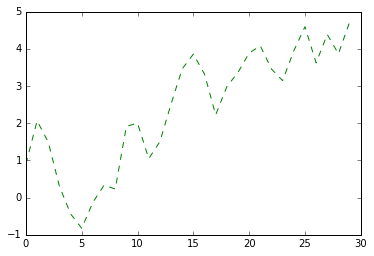

In [20]:
plt.plot(randn(30).cumsum(), 'g--')

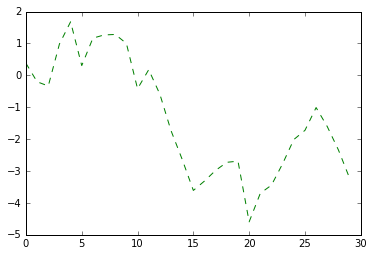

In [21]:
plt.plot(randn(30).cumsum(), linestyle = '--', color = 'g')

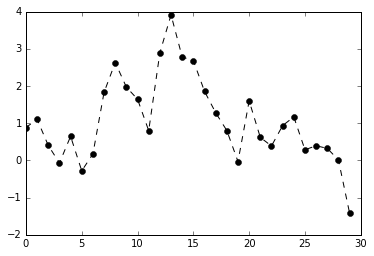

In [22]:
plt.plot(randn(30).cumsum(), 'ko--')

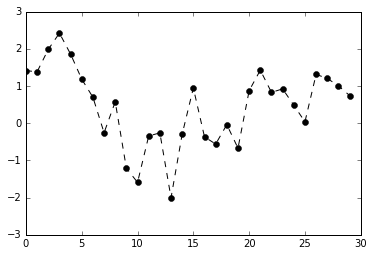

In [23]:
plt.plot(randn(30).cumsum(), 'ko--', linestyle = 'dashed', marker = 'o')

In [24]:
data = randn(30).cumsum()

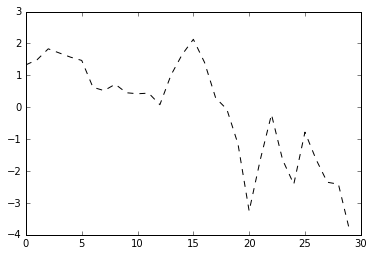

In [25]:
plt.plot(data, 'k--', label = 'Default')

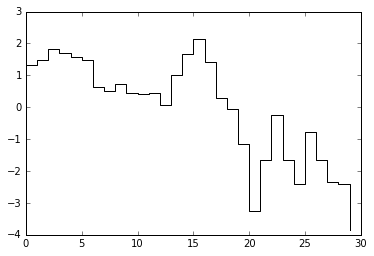

In [26]:
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')

/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


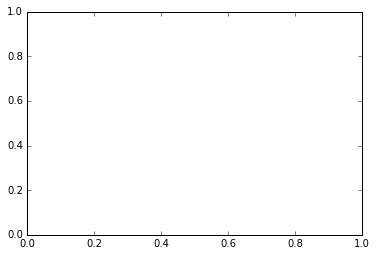

In [28]:
plt.legend(loc = 'best', label = '...')

## Ticks, Labels and Legends

## Seting the title, axis labels, ticks, and ticklabels

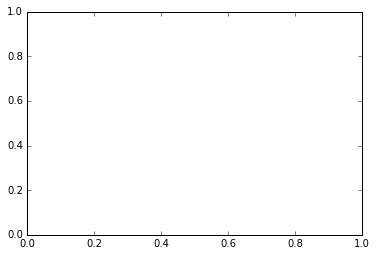

In [29]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [30]:
ax.plot(randn(1000).cumsum())

In [31]:
ticks = ax.set_xticks([0, 250, 500, 750, 100])

In [32]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation = 30, fontsize = 'small')

In [33]:
ax.set_title('My first matplotlib plot')

In [34]:
ax.set_xlabel('Stages')

## Adding legend

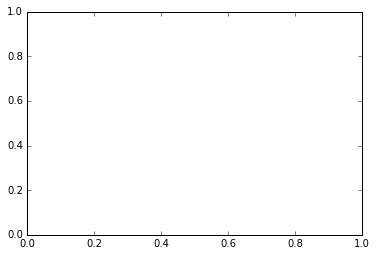

In [35]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [37]:
ax.plot(randn(1000).cumsum(), 'k', label = 'one')

In [38]:
ax.plot(randn(1000).cumsum(), 'k--', label = 'two')

In [39]:
ax.plot(randn(1000).cumsum(), 'k.', label = 'two')

In [40]:
ax.legend(loc = 'best')

## Anotations and Driving on a subplot

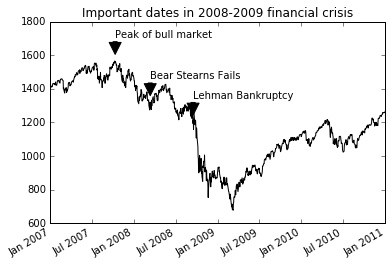

In [42]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col = 0, parse_dates=True)
spx = data['SPX']

spx.plot(ax = ax, style = 'k-')

crisis_data = [
               (datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')
               ]

for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 50),
                xytext = (date, spx.asof(date) + 200),
                arrowprops = dict(facecolor = 'black'),
                horizontalalignment = 'left', verticalalignment = 'top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

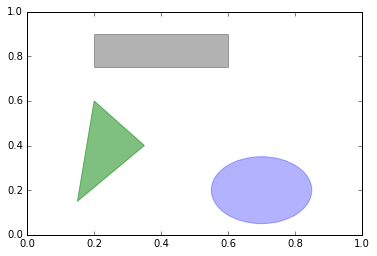

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = 'k', alpha = 0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color = 'b', alpha = 0.3)
pgin = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color = 'g', alpha = 0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgin)

## Saving plot to file

## matplotlib configute

In [44]:
plt.rc('figure', figsize = (10, 10))

## Plotting functions in pandas

## Line plots

In [45]:
from pandas import Series
from pandas import DataFrame
import pandas as pd

In [46]:
s = Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))

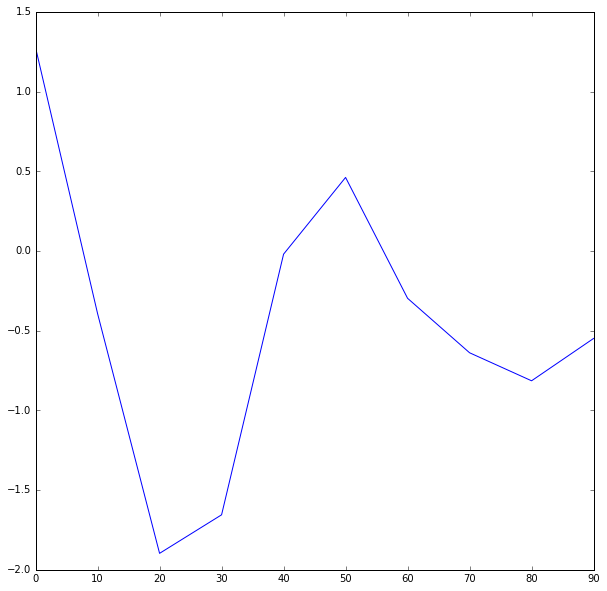

In [47]:
s.plot()

In [48]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns = ['A', 'B', 'C', 'D'],
               index = np.arange(0, 100, 10))

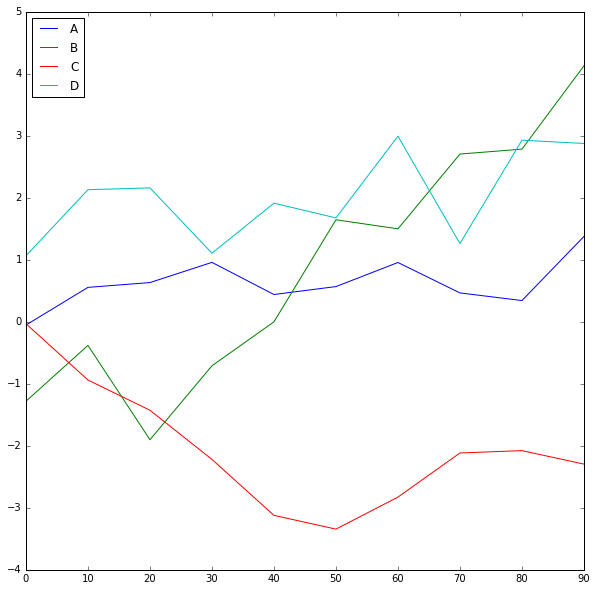

In [49]:
df.plot()

## Bar Plots

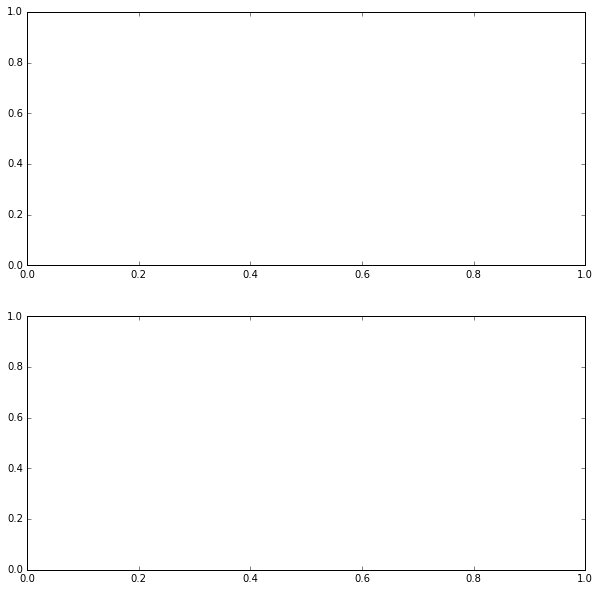

In [50]:
fig, axes = plt.subplots(2, 1)

In [51]:
data = Series(np.random.rand(16), index = list('abcdefghijklmnop'))

In [52]:
data.plot(kind = 'bar', ax = axes[0], color = 'k', alpha = 0.7)

In [53]:
data.plot(kind = 'barh', ax = axes[0], color = 'k', alpha = 0.7)

In [54]:
df = DataFrame(np.random.rand(6, 4),
               index = ['one', 'two', 'three', 'four', 'five', 'sex'],
               columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))

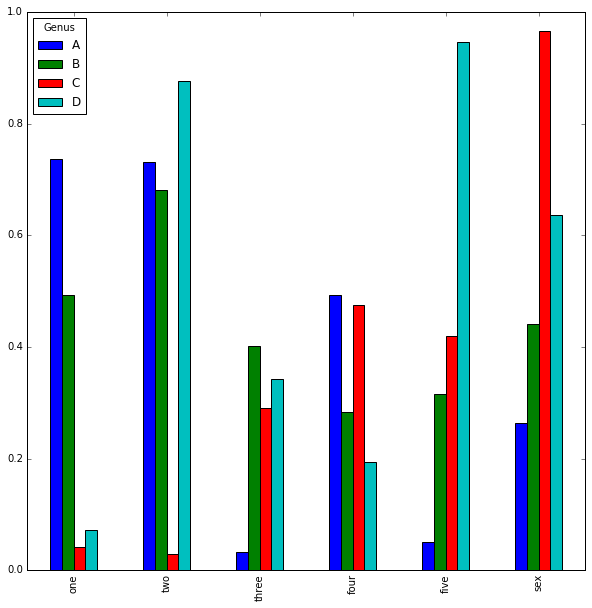

In [55]:
df.plot(kind = 'bar')

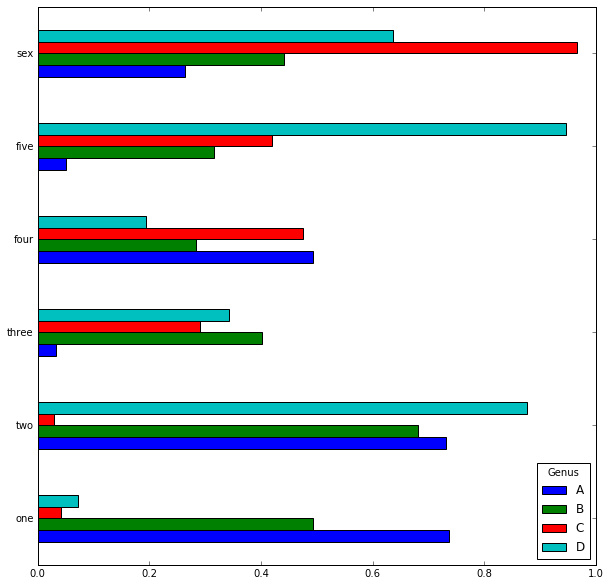

In [56]:
df.plot(kind = 'barh')

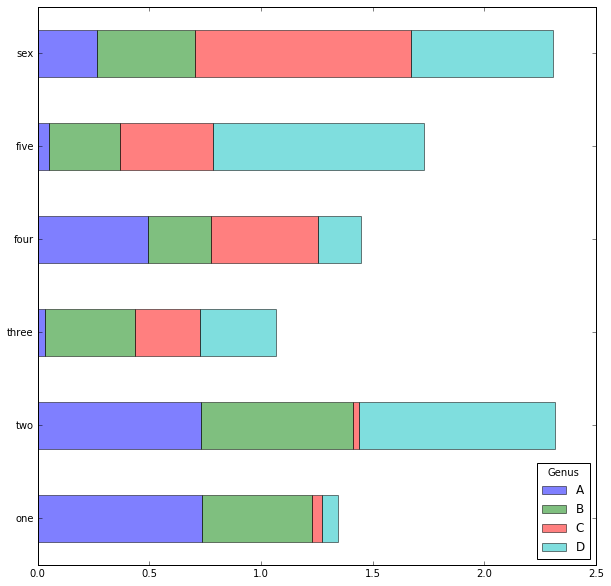

In [57]:
df.plot(kind = 'barh', stacked = True, alpha = 0.5)

In [58]:
tips = pd.read_csv('ch08/tips.csv')

In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
party_counts = pd.crosstab(tips.day, tips.size)
party_counts

col_0,1708
day,
Fri,19
Sat,87
Sun,76
Thur,62


In [64]:
party_counts = party_counts.ix[:, 2:5]
party_counts

col_0
day
Fri
Sat
Sun
Thur


In [24]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis = 0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


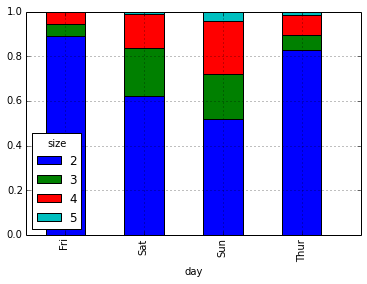

In [25]:
party_pcts.plot(kind = 'bar', stacked = True)

## Histograms and Density Plots

In [67]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

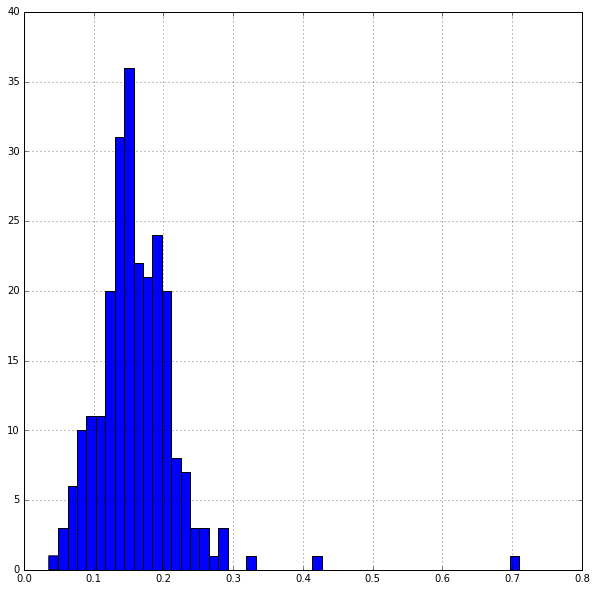

In [72]:
tips['tip_pct'].hist(bins = 50)

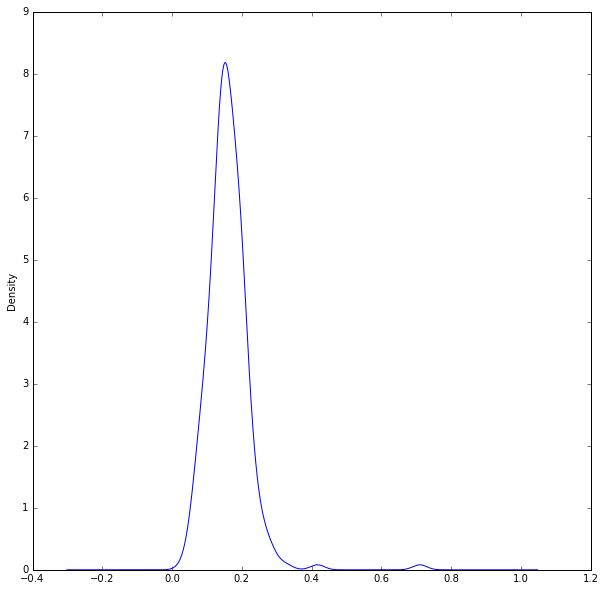

In [73]:
import scipy
tips['tip_pct'].plot(kind = 'kde')

In [74]:
comp1 = np.random.normal(0, 1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)

In [75]:
values = Series(np.concatenate([comp1, comp2]))

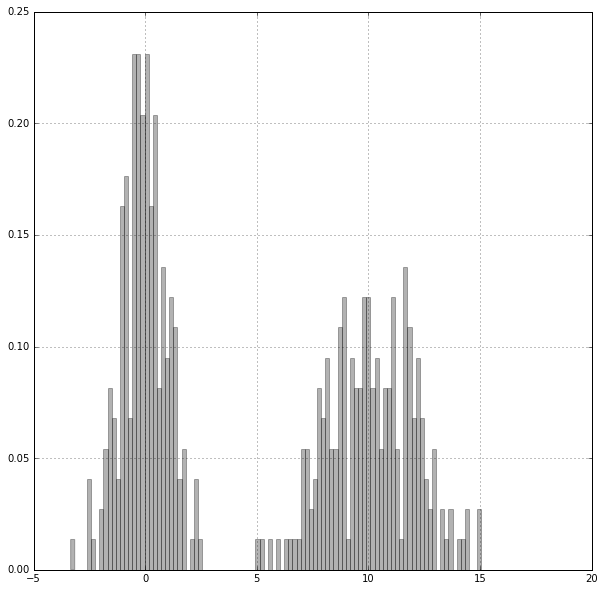

In [76]:
values.hist(bins = 100, alpha = 0.3, color = 'k', normed = True)

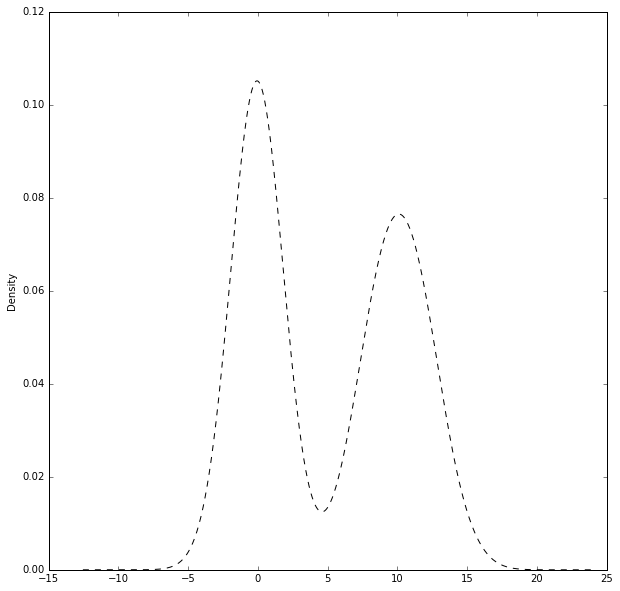

In [77]:
values.plot(kind = 'kde', style = 'k--')

## Scatter Plots

In [78]:
macro = pd.read_csv('ch08/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [79]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [80]:
trans_data = np.log(data).diff().dropna()

In [81]:
trans_data[:5]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


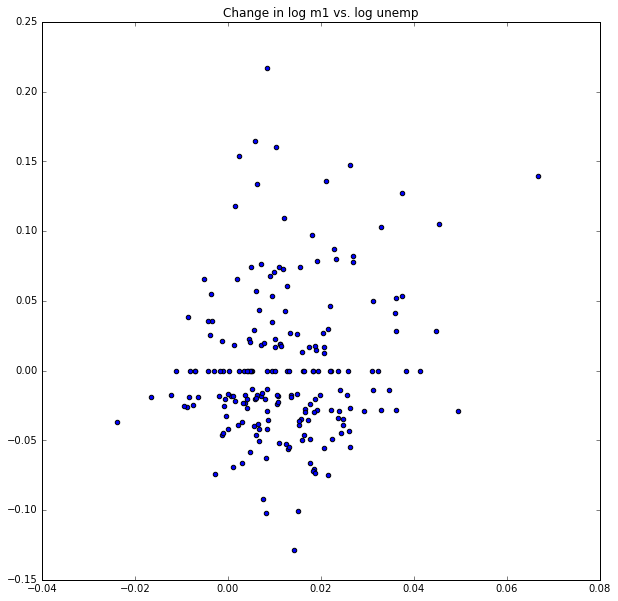

In [84]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Change in log %s vs. log %s' %('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1132fa630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11606fcc0>]], dtype=object)

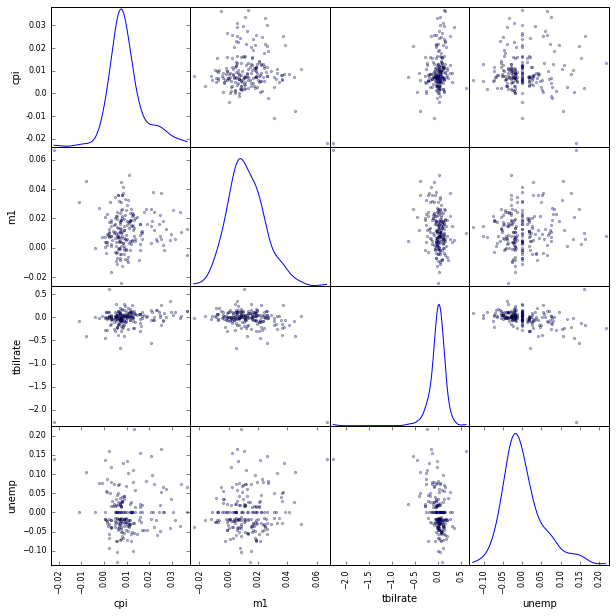

In [85]:
pd.scatter_matrix(trans_data, diagonal = 'kde', color = 'k', alpha = 0.3)

## Plotting Maps: Visualization Haiti Earthquake Crisis Data

In [86]:
data = pd.read_csv('ch08/Haiti.csv')

In [87]:
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [88]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][: 10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [89]:
data['CATEGORY'][: 6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [90]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [91]:
data = data[(data.LATITUDE > 18) & (data.LONGITUDE < 20) &
           (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
           & data.CATEGORY.notnull()]

In [92]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [104]:
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

In [105]:
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [106]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [107]:
all_cats = get_all_categories(data.CATEGORY)

In [108]:
english_mapping = dict(get_english(x) for x in all_cats)

In [109]:
english_mapping['2a']

'Food Shortage'

In [110]:
english_mapping['6c']

'Earthquake and aftershocks'

In [113]:
def get_code(seq):
    return [x.strip(',')[0] for x in seq if x]

all_codes = get_code(all_cats)

code_index = pd.Index(np.unique(all_codes))

dummpy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                         index = data.index, columns = code_index)

In [116]:
dummpy_frame.ix[: 6, : 6]

,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummpy_frame.ix[row, codes] = 1

In [119]:
data = data.join(dummpy_frame.add_prefix('category_'))

In [120]:
data.ix[: 5, : 5]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...
